In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import scipy.stats as stats# for qq plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('C:\\Users\\pshah\\Desktop\\ml_ krishniyak\\data_set\\concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### wiithout power transformer

In [5]:
lr=LinearRegression()

In [6]:
x=df.drop('Strength',axis=1)
y=df['Strength']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [8]:
np.mean(cross_val_score(lr,x_train,y_train,cv=10,scoring='r2'))

0.596820758784056

In [9]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [10]:
print('accuracy of LR without transformation',r2_score(y_test,y_pred))

accuracy of LR without transformation 0.5969851098437959


### with the power transformation 

In [11]:
trf=PowerTransformer()

In [12]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [13]:
np.mean(cross_val_score(lr,x_train_trf,y_train,cv=10,scoring='r2'))

0.7993007531617163

In [14]:
lr.fit(x_train_trf,y_train)
y_pred1=lr.predict(x_test_trf)

In [15]:
print('accuracy of LR with transformation',r2_score(y_test,y_pred1))

accuracy of LR with transformation 0.7949173005906591


#### now we will have a look of dristribution of the variable with the PDF plot without transformation

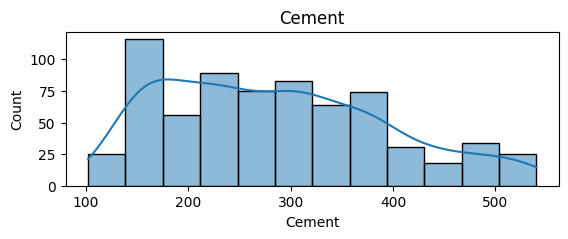

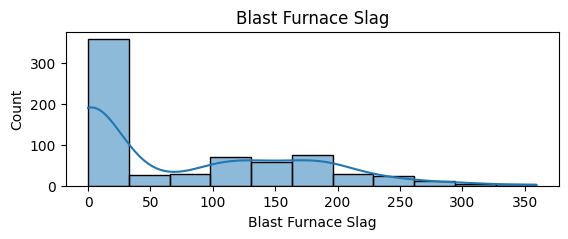

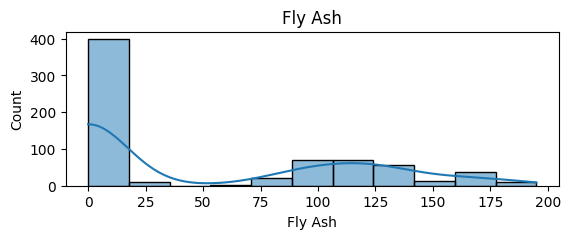

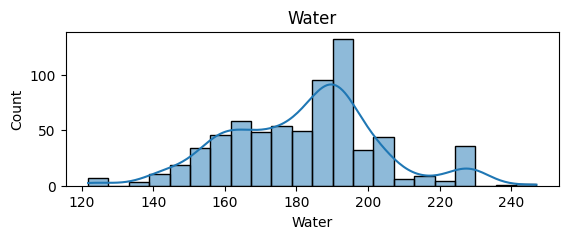

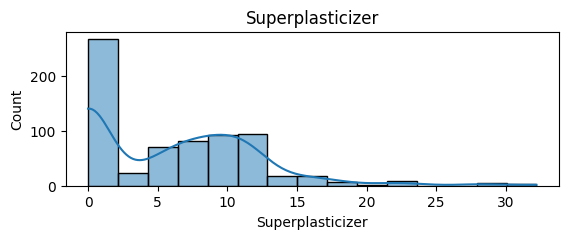

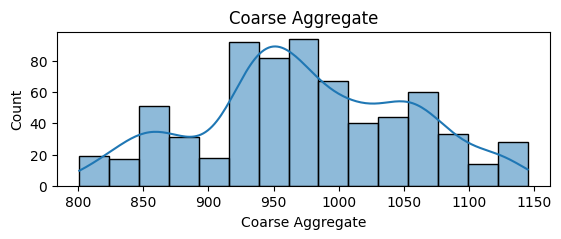

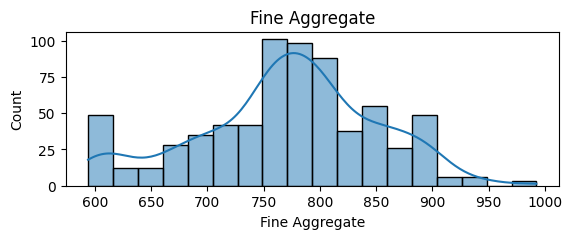

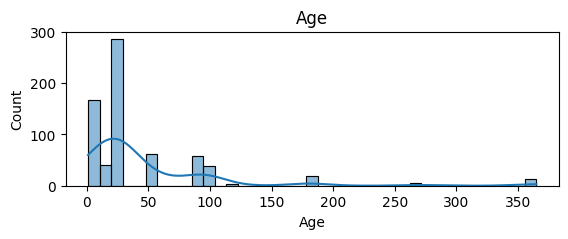

In [16]:
for col in x_train.columns:
    plt.figure(figsize=(14,2))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)
    plt.show()

#### dristibution of the graph after the powertransformation

In [18]:
x_train_trf_df = pd.DataFrame(x_train_trf, columns=x_train.columns)

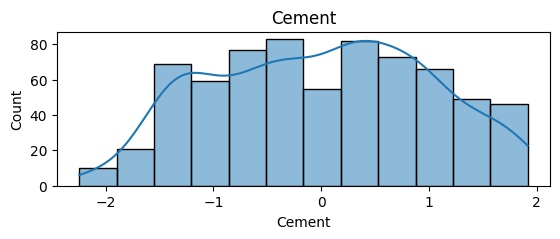

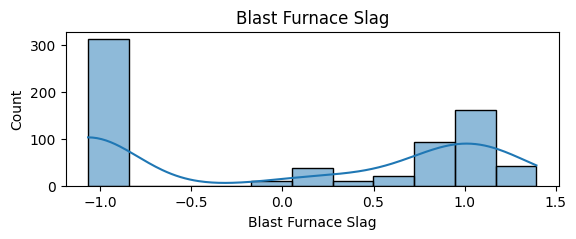

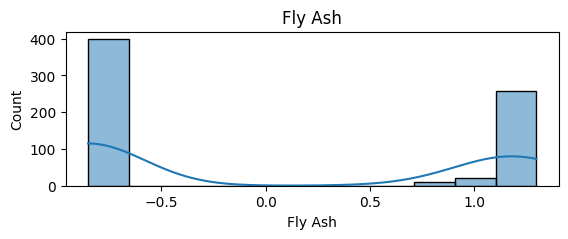

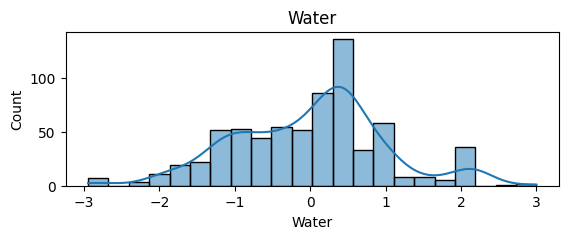

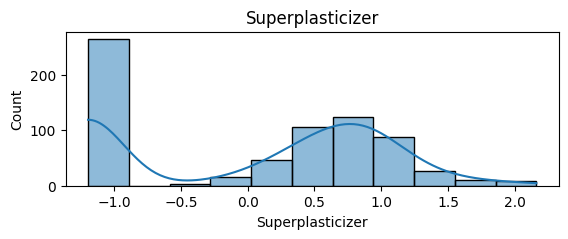

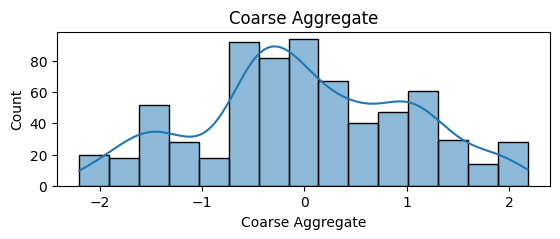

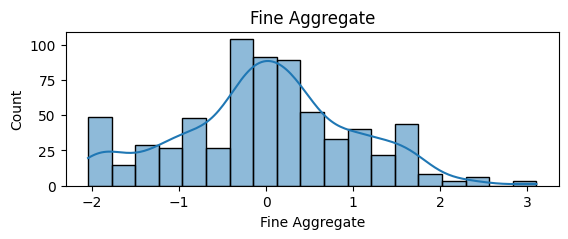

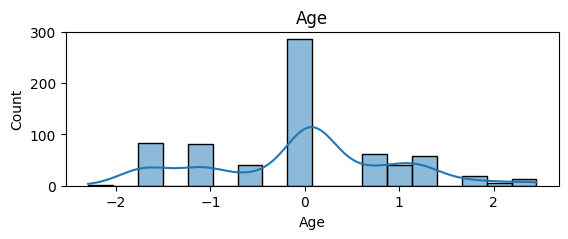

In [19]:
for col in x_train_trf_df.columns:
    plt.figure(figsize=(14,2))
    plt.subplot(121)
    sns.histplot(x_train_trf_df[col],kde=True)
    plt.title(col)
    plt.show()